## Overview:
The data set for this project has been taken from Kaggle. The data set is simple. This project aims to predict whether Person has Diabetes or Not

## Dataset:
Diabetes Data Set: Predict a Model to detect Person has Diabetes or Not<br>
https://www.kaggle.com/datasets/vikasukani/diabetes-data-set

## Step 01: Import all the required Libraries

Let's load the necessary libraries and data and start coding.

- <strong>NumPy</strong> : stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.
- <strong>Pandas</strong> : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- <strong>Sklearn</strong> : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- <strong>Pickle</strong> : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- <strong>Matplotlib</strong> : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.
- <strong>Seaborn</strong> : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Step 02: Read all the required Data
In this stage we are going to read our problem dataset and have a look on it.

In [2]:
# Loading the data in pandas dataframe
try: 
    diabetes_dataset = pd.read_csv('Data/diabetes.csv')
    print("Data Reading Done Successfully....")
    
except (FileNotFoundError, IOError):
    print("Wrong File or File path")

Data Reading Done Successfully....


After we read the data, we can look at the data using:

In [3]:
# Check the first five records
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check the last five records
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Step 03: Data Exploration
Now we explore the data using different techniques..

In [5]:
# Checking the rows and columns of the dataset
print (f'The train data has {diabetes_dataset.shape[0]} rows and {diabetes_dataset.shape[1]} columns')

The train data has 768 rows and 9 columns


In [6]:
# Getting more insights of the data using .info() method
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Statistic of the dataset
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Checking whether dataset contains any missing value or not

In [8]:
# Chcek Missing values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As we can see there is no missing value present in the dataset

#### Lets check the distrubutions of the features..

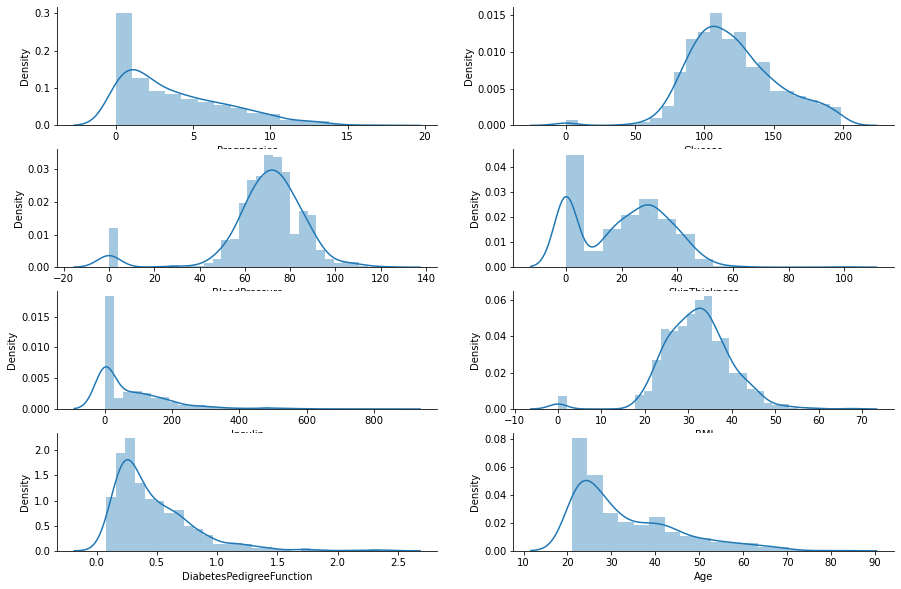

In [9]:
# Distributions of the features
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15,10))
count = 0
for i in range(4):
    for j in range(2):
        sns.distplot(a=diabetes_dataset[diabetes_dataset.columns[count]], ax=axis[i,j])
        count+=1
sns.despine()
plt.show()

Most of the features have a normal distribution but there are more zero values present in some features.

In [14]:
df = diabetes_dataset[diabetes_dataset.columns[:-1]]
zero_count = df[df == 0].count()
data = pd.DataFrame(zero_count).T

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


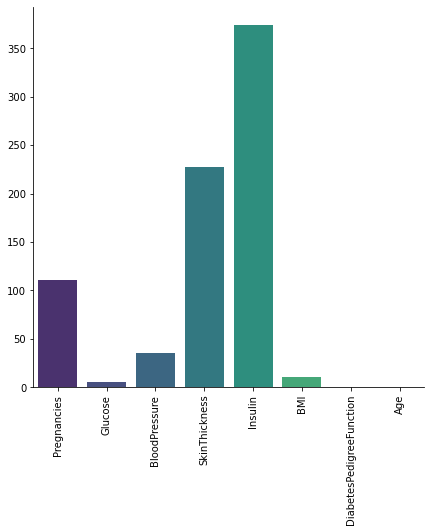

In [11]:
plt.figure(figsize=(7,7))
sns.barplot(data=data, palette='viridis')
plt.xticks(rotation=90)
print(zero_count)
sns.despine()
plt.show()

From the observation of the bar chart we can see that there are many zero values in many features. so firstly we need to handle this problem.

In [12]:
# Function to impute the zero values in the features"
def impute_zero(df, *args):
    for feature in args:
        df[feature] = df[feature].replace(0, df[feature].median())

In [13]:
# Apply impute_zero function
impute_zero(diabetes_dataset, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


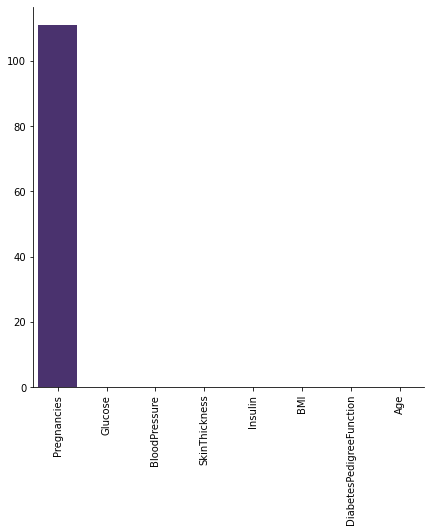

In [15]:
plt.figure(figsize=(7,7))
sns.barplot(data=data, palette='viridis')
plt.xticks(rotation=90)
print(diabetes_dataset[diabetes_dataset == 0].count()[:-1])
sns.despine()
plt.show()

Here in this problem we can't replace the zero values of the Pregnancies feature because it can be possible that some person never gets pregnemt.

<AxesSubplot:>

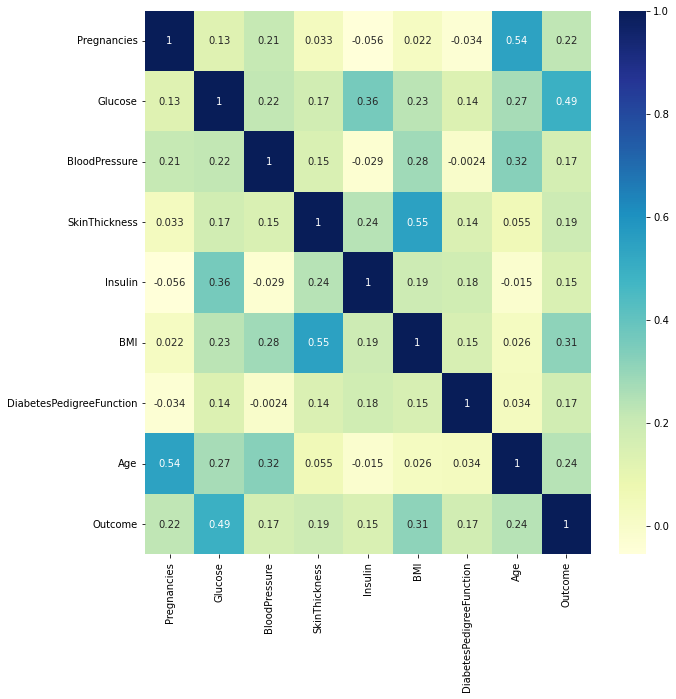

In [16]:
# Correlation Plot to check the multicolinearity between the features
corr = diabetes_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="YlGnBu", annot=True)

In this plot we can clearly see that there is no multicolinearity present.

#### Checking whether the dataset is imbalance or not

In [17]:
diabetes_True = diabetes_dataset[diabetes_dataset['Outcome'] == 1].shape[0]
diabetes_False = diabetes_dataset[diabetes_dataset['Outcome'] == 0].shape[0]

In [18]:
print(diabetes_True, diabetes_False)

268 500


As there are no less value for both the features so the dataset is not imbalance one.

## Step 04: Data Pre-Processing
Make data ready for Machine Learning model...

In [19]:
# Separate the other features and the target fetaures
X = diabetes_dataset.drop('Outcome', axis=1)
y = diabetes_dataset['Outcome']

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [21]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [22]:
# Scaling the values in the common range 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

## Step 5: Split the data into train and test set
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate are its predictions.
- Here we are splitting the data so that the training dataset contains 80% of the data and the test dataset contains 20% of the total data.
- Here we are using the train_test_split method from the sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

- test_size: Here we specify the size we want for our test dataset.

- random_state: When we use a random number generator for number or sequence generation, we give a starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split().

In [23]:
# Splitting the dataset into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

In [24]:
#display the shapes of the x and y train and test dataset.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


## Step 6: Train the Model using Linear Regression 

In [25]:
# Creating the instance of the Linear regression
log_reg = LogisticRegression()

In [26]:
# Train the model
log_reg.fit(X_train, y_train)
print("Training is done successfully..")

Training is done successfully..


In [27]:
# make prediction on test data
y_pred = log_reg.predict(X_test)

In [28]:
# Checking the confusion matrix
confusion_matrix(y_test, y_pred)

array([[82, 17],
       [19, 36]], dtype=int64)

In [29]:
score = accuracy_score(y_test, y_pred)

In [30]:
# Tesing the accuracy score of the model
print(f"The accuracy score of the model is: {round((score), 2)*100}%")

The accuracy score of the model is: 77.0%


In [31]:
# Priting the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [32]:
# Saving the result
result = pd.DataFrame({'y_test':np.array(y_test).reshape(len(y_test)), 'y_pred':y_pred}, index=range(len(y_pred)))
result.y_pred = result.y_pred.apply(lambda x: round(x**2,1))
result.y_test = result.y_test.apply(lambda x: round(x**2,1))
result.to_csv('Diabetes Classification model result.csv')

## Step 7: Save the model in a pickle file
As model is giving very good accuracy we'll go with it and save it to pickle file. We save our model to pickle files so that when we want to perform predictions on unseen data, we don't have to train our model again. Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream.

In [33]:
# Save the model to disk
pickle.dump(log_reg, open('Diabetes Classification model.pickle', 'wb'))

## Summary
Now our model is ready and whenever we need to do calssification, we just load the model using pickle and can do classifcation.